In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import pyarrow.parquet as pq
import s3fs

fs = s3fs.S3FileSystem(anon=True, key='minio', secret='minio123', client_kwargs=dict(endpoint_url="http://localhost:9000"))
fs.ls("flights-data/flights-clean")
# 
df = pq.ParquetDataset('s3://flights-data/flights-clean', filesystem = fs).read_pandas().to_pandas()

In [3]:
df.count()

month                  5332914
day                    5332914
day_of_week            5332914
airline                5332914
flight_number          5332914
tail_number            5318547
origin_airport         5332914
destination_airport    5332914
scheduled_departure    5332914
departure_time         5249100
departure_delay        5249100
taxi_out               5246302
wheels_off             5246302
scheduled_time         5332908
elapsed_time           5231130
air_time               5231130
distance               5332914
wheels_on              5242972
taxi_in                5242972
scheduled_arrival      5332914
arrival_time           5242972
arrival_delay          5231130
diverted               5332914
cancelled              5332914
cancellation_reason      87430
air_system_delay       1003360
security_delay         1003360
airline_delay          1003360
late_aircraft_delay    1003360
weather_delay          1003360
AL_AIRLINE             5332914
ORIG_AIRPORT           5332914
ORIG_CIT

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED
0,11,30,1,WN,552,N7721E,LGA,DAL,0615,0609,-6.0,20.0,0629,250.0,244.0,221.0,1381,0910,3.0,0925,0913,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,LaGuardia Airport (Marine Air Terminal),New York,NY,40.77724,-73.87261,Dallas Love Field,Dallas,TX,32.84711,-96.85177,0
1,11,30,1,WN,271,N565WN,MCI,ATL,0615,0611,-4.0,11.0,0622,125.0,125.0,88.0,692,0850,26.0,0920,0916,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Kansas City International Airport,Kansas City,MO,39.29761,-94.71391,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,0
2,11,30,1,WN,673,N799SW,MCO,BNA,0615,0611,-4.0,15.0,0626,120.0,112.0,93.0,616,0659,4.0,0715,0703,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Orlando International Airport,Orlando,FL,28.42889,-81.31603,Nashville International Airport,Nashville,TN,36.12448,-86.67818,0
3,11,30,1,WN,2720,N952WN,OAK,SAN,0615,0616,1.0,13.0,0629,90.0,85.0,67.0,446,0736,5.0,0745,0741,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Oakland International Airport,Oakland,CA,37.72129,-122.22072,San Diego International Airport (Lindbergh Field),San Diego,CA,32.73356,-117.18966,0
4,11,30,1,WN,805,N725SW,OKC,DEN,0615,0610,-5.0,13.0,0623,105.0,95.0,73.0,495,0636,9.0,0700,0645,-15.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Will Rogers World Airport,Oklahoma City,OK,35.39309,-97.60073,Denver International Airport,Denver,CO,39.85841,-104.66700,0


In [5]:
df.head()

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED
0,11,30,1,WN,552,N7721E,LGA,DAL,0615,0609,-6.0,20.0,0629,250.0,244.0,221.0,1381,0910,3.0,0925,0913,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,LaGuardia Airport (Marine Air Terminal),New York,NY,40.77724,-73.87261,Dallas Love Field,Dallas,TX,32.84711,-96.85177,0
1,11,30,1,WN,271,N565WN,MCI,ATL,0615,0611,-4.0,11.0,0622,125.0,125.0,88.0,692,0850,26.0,0920,0916,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Kansas City International Airport,Kansas City,MO,39.29761,-94.71391,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,0
2,11,30,1,WN,673,N799SW,MCO,BNA,0615,0611,-4.0,15.0,0626,120.0,112.0,93.0,616,0659,4.0,0715,0703,-12.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Orlando International Airport,Orlando,FL,28.42889,-81.31603,Nashville International Airport,Nashville,TN,36.12448,-86.67818,0
3,11,30,1,WN,2720,N952WN,OAK,SAN,0615,0616,1.0,13.0,0629,90.0,85.0,67.0,446,0736,5.0,0745,0741,-4.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Oakland International Airport,Oakland,CA,37.72129,-122.22072,San Diego International Airport (Lindbergh Field),San Diego,CA,32.73356,-117.18966,0
4,11,30,1,WN,805,N725SW,OKC,DEN,0615,0610,-5.0,13.0,0623,105.0,95.0,73.0,495,0636,9.0,0700,0645,-15.0,0,0,None,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Will Rogers World Airport,Oklahoma City,OK,35.39309,-97.60073,Denver International Airport,Denver,CO,39.85841,-104.66700,0


In [6]:
df.shape

(5332914, 42)

In [7]:
df.columns

Index(['month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'AL_AIRLINE', 'ORIG_AIRPORT',
       'ORIG_CITY', 'ORIG_STATE', 'ORIG_LATITUDE', 'ORIG_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE',
       'DEST_LONGITUDE', 'DELAYED'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of          month  day  day_of_week airline  flight_number tail_number  \
0           11   30            1      WN            552      N7721E   
1           11   30            1      WN            271      N565WN   
2           11   30            1      WN            673      N799SW   
3           11   30            1      WN           2720      N952WN   
4           11   30            1      WN            805      N725SW   
...        ...  ...          ...     ...            ...         ...   
5332909      9   29            2      UA           1586      N16713   
5332910      9   29            2      NK            419      N533NK   
5332911      9   29            2      B6            548      N351JB   
5332912      9   29            2      MQ           3639      N600MQ   
5332913      9   29            2      UA           1051      N36207   

        origin_airport destination_airport scheduled_departure departure_time  \
0                  LGA          

In [9]:
df.isnull().any()

month                  False
day                    False
day_of_week            False
airline                False
flight_number          False
tail_number             True
origin_airport         False
destination_airport    False
scheduled_departure    False
departure_time          True
departure_delay         True
taxi_out                True
wheels_off              True
scheduled_time          True
elapsed_time            True
air_time                True
distance               False
wheels_on               True
taxi_in                 True
scheduled_arrival      False
arrival_time            True
arrival_delay           True
diverted               False
cancelled              False
cancellation_reason     True
air_system_delay        True
security_delay          True
airline_delay           True
late_aircraft_delay     True
weather_delay           True
AL_AIRLINE             False
ORIG_AIRPORT           False
ORIG_CITY              False
ORIG_STATE             False
ORIG_LATITUDE 

In [10]:
df[df["tail_number"].isna()].head(5)
# df["tail_number"].isna()

,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED
349,11,30,1,AA,791,None,BOS,PHL,0530,None,NaN,NaN,None,86.0,NaN,NaN,280,None,NaN,0656,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Gen. Edward Lawrence Logan International Airport,Boston,MA,42.36435,-71.00518,Philadelphia International Airport,Philadelphia,PA,39.87195,-75.24114,0
949,11,30,1,UA,600,None,ORD,DCA,0600,None,NaN,NaN,None,112.0,NaN,NaN,612,None,NaN,0852,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,Ronald Reagan Washington National Airport,Arlington,VA,38.85208,-77.03772,0
1552,11,30,1,UA,263,None,DEN,ORD,1300,None,NaN,NaN,None,146.0,NaN,NaN,888,None,NaN,1626,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Denver International Airport,Denver,CO,39.85841,-104.66700,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,0
1718,11,30,1,AA,2056,None,RSW,CLT,1310,None,NaN,NaN,None,115.0,NaN,NaN,600,None,NaN,1505,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Southwest Florida International Airport,Ft. Myers,FL,26.53617,-81.75517,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,0
4762,11,30,1,UA,459,None,ORD,DEN,1610,None,NaN,NaN,None,164.0,NaN,NaN,888,None,NaN,1754,None,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446,Denver International Airport,Denver,CO,39.85841,-104.66700,0


In [11]:
df["departure_time"].isna().sum()

83814

In [12]:
# this method is originally published in StackOverFlow
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 42 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
cancellation_reason,5245484,98.4
late_aircraft_delay,4329554,81.2
weather_delay,4329554,81.2
air_system_delay,4329554,81.2
security_delay,4329554,81.2
airline_delay,4329554,81.2
arrival_delay,101784,1.9
elapsed_time,101784,1.9
air_time,101784,1.9
wheels_on,89942,1.7


In [13]:
df.isnull().sum().sort_values(ascending = False)

cancellation_reason    5245484
late_aircraft_delay    4329554
weather_delay          4329554
airline_delay          4329554
security_delay         4329554
air_system_delay       4329554
air_time                101784
arrival_delay           101784
elapsed_time            101784
wheels_on                89942
arrival_time             89942
taxi_in                  89942
wheels_off               86612
taxi_out                 86612
departure_time           83814
departure_delay          83814
tail_number              14367
DEST_LATITUDE             4610
DEST_LONGITUDE            4610
ORIG_LATITUDE             4605
ORIG_LONGITUDE            4605
scheduled_time               6
DEST_CITY                    0
DEST_AIRPORT                 0
ORIG_STATE                   0
ORIG_CITY                    0
ORIG_AIRPORT                 0
AL_AIRLINE                   0
DEST_STATE                   0
month                        0
cancelled                    0
diverted                     0
day     

In [14]:
df = df.drop(["cancellation_reason","late_aircraft_delay","weather_delay","airline_delay", "security_delay", "air_system_delay", "tail_number"], axis=1)

In [15]:
df = df.dropna(subset=["scheduled_time", "ORIG_LONGITUDE", "ORIG_LATITUDE","DEST_LONGITUDE", "DEST_LATITUDE", "departure_delay", "departure_time", "taxi_out","wheels_off", "taxi_in", "arrival_time","wheels_on", "elapsed_time", "arrival_delay","air_time"])

In [16]:
missing_values_table(df)

Your selected dataframe has 35 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
df["scheduled_departure_hour"] = df.scheduled_departure.str[:2].astype(int)
df["scheduled_departure_minute"] = df.scheduled_departure.str[2:].astype(int)

df["departure_time_hour"] = df.departure_time.str[:2].astype(int)
df["departure_time_minute"] = df.departure_time.str[2:].astype(int)

df["scheduled_arrival_hour"] = df.scheduled_arrival.str[:2].astype(int)
df["scheduled_arrival_minute"] = df.scheduled_arrival.str[2:].astype(int)

df["arrival_time_hour"] = df.arrival_time.str[:2].astype(int)
df["arrival_time_minute"] = df.arrival_time.str[2:].astype(int)

df["wheels_on_hour"] = df.wheels_on.str[:2].astype(int)
df["wheels_on_minute"] = df.wheels_on.str[2:].astype(int)

df["wheels_off_hour"] = df.wheels_off.str[:2].astype(int)
df["wheels_off_minute"] = df.wheels_off.str[2:].astype(int)


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,5222000.0,6.228877,3.377674,1.00000,3.00000,6.00000,9.00000,12.00000
day,5222000.0,15.694352,8.765640,1.00000,8.00000,16.00000,23.00000,31.00000
day_of_week,5222000.0,3.925464,1.990362,1.00000,2.00000,4.00000,6.00000,7.00000
flight_number,5222000.0,2169.281170,1758.518205,1.00000,728.00000,1680.00000,3230.00000,9320.00000
departure_delay,5222000.0,9.700099,37.396914,-82.00000,-5.00000,-1.00000,8.00000,1988.00000
taxi_out,5222000.0,16.100824,8.978905,1.00000,11.00000,14.00000,19.00000,225.00000
scheduled_time,5222000.0,142.087294,75.389052,18.00000,86.00000,123.00000,174.00000,718.00000
elapsed_time,5222000.0,137.277285,74.325452,14.00000,82.00000,119.00000,169.00000,766.00000
air_time,5222000.0,113.741863,72.323895,7.00000,61.00000,95.00000,144.00000,690.00000
distance,5222000.0,825.754168,608.970283,31.00000,373.00000,651.00000,1067.00000,4983.00000


In [19]:

df.head(5)

,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED,scheduled_departure_hour,scheduled_departure_minute,departure_time_hour,departure_time_minute,scheduled_arrival_hour,scheduled_arrival_minute,arrival_time_hour,arrival_time_minute,wheels_on_hour,wheels_on_minute,wheels_off_hour,wheels_off_minute
0,11,30,1,WN,552,LGA,DAL,0615,0609,-6.0,20.0,0629,250.0,244.0,221.0,1381,0910,3.0,0925,0913,-12.0,0,0,Southwest Airlines Co.,LaGuardia Airport (Marine Air Terminal),New York,NY,40.77724,-73.87261,Dallas Love Field,Dallas,TX,32.84711,-96.85177,0,6,15,6,9,9,25,9,13,9,10,6,29
1,11,30,1,WN,271,MCI,ATL,0615,0611,-4.0,11.0,0622,125.0,125.0,88.0,692,0850,26.0,0920,0916,-4.0,0,0,Southwest Airlines Co.,Kansas City International Airport,Kansas City,MO,39.29761,-94.71391,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,0,6,15,6,11,9,20,9,16,8,50,6,22
2,11,30,1,WN,673,MCO,BNA,0615,0611,-4.0,15.0,0626,120.0,112.0,93.0,616,0659,4.0,0715,0703,-12.0,0,0,Southwest Airlines Co.,Orlando International Airport,Orlando,FL,28.42889,-81.31603,Nashville International Airport,Nashville,TN,36.12448,-86.67818,0,6,15,6,11,7,15,7,3,6,59,6,26
3,11,30,1,WN,2720,OAK,SAN,0615,0616,1.0,13.0,0629,90.0,85.0,67.0,446,0736,5.0,0745,0741,-4.0,0,0,Southwest Airlines Co.,Oakland International Airport,Oakland,CA,37.72129,-122.22072,San Diego International Airport (Lindbergh Field),San Diego,CA,32.73356,-117.18966,0,6,15,6,16,7,45,7,41,7,36,6,29
4,11,30,1,WN,805,OKC,DEN,0615,0610,-5.0,13.0,0623,105.0,95.0,73.0,495,0636,9.0,0700,0645,-15.0,0,0,Southwest Airlines Co.,Will Rogers World Airport,Oklahoma City,OK,35.39309,-97.60073,Denver International Airport,Denver,CO,39.85841,-104.66700,0,6,15,6,10,7,0,6,45,6,36,6,23


In [20]:
df.dtypes




month                           int32
day                             int32
day_of_week                     int32
airline                        object
flight_number                   int32
origin_airport                 object
destination_airport            object
scheduled_departure            object
departure_time                 object
departure_delay               float64
taxi_out                      float64
wheels_off                     object
scheduled_time                float64
elapsed_time                  float64
air_time                      float64
distance                        int32
wheels_on                      object
taxi_in                       float64
scheduled_arrival              object
arrival_time                   object
arrival_delay                 float64
diverted                        int32
cancelled                       int32
AL_AIRLINE                     object
ORIG_AIRPORT                   object
ORIG_CITY                      object
ORIG_STATE  

In [21]:
import category_encoders as ce

names = ['airline', "origin_airport", "destination_airport", "ORIG_CITY", "ORIG_STATE", "DEST_CITY", "DEST_STATE"]

enc = ce.ordinal.OrdinalEncoder(cols=names)
enc.fit(df)
df = enc.transform(df)


/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [22]:
df.head(5)

,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,AL_AIRLINE,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,DELAYED,scheduled_departure_hour,scheduled_departure_minute,departure_time_hour,departure_time_minute,scheduled_arrival_hour,scheduled_arrival_minute,arrival_time_hour,arrival_time_minute,wheels_on_hour,wheels_on_minute,wheels_off_hour,wheels_off_minute
0,11,30,1,1,552,1,1,0615,0609,-6.0,20.0,0629,250.0,244.0,221.0,1381,0910,3.0,0925,0913,-12.0,0,0,Southwest Airlines Co.,LaGuardia Airport (Marine Air Terminal),1,1,40.77724,-73.87261,Dallas Love Field,1,1,32.84711,-96.85177,0,6,15,6,9,9,25,9,13,9,10,6,29
1,11,30,1,1,271,2,2,0615,0611,-4.0,11.0,0622,125.0,125.0,88.0,692,0850,26.0,0920,0916,-4.0,0,0,Southwest Airlines Co.,Kansas City International Airport,2,2,39.29761,-94.71391,Hartsfield-Jackson Atlanta International Airport,2,2,33.64044,-84.42694,0,6,15,6,11,9,20,9,16,8,50,6,22
2,11,30,1,1,673,3,3,0615,0611,-4.0,15.0,0626,120.0,112.0,93.0,616,0659,4.0,0715,0703,-12.0,0,0,Southwest Airlines Co.,Orlando International Airport,3,3,28.42889,-81.31603,Nashville International Airport,3,3,36.12448,-86.67818,0,6,15,6,11,7,15,7,3,6,59,6,26
3,11,30,1,1,2720,4,4,0615,0616,1.0,13.0,0629,90.0,85.0,67.0,446,0736,5.0,0745,0741,-4.0,0,0,Southwest Airlines Co.,Oakland International Airport,4,4,37.72129,-122.22072,San Diego International Airport (Lindbergh Field),4,4,32.73356,-117.18966,0,6,15,6,16,7,45,7,41,7,36,6,29
4,11,30,1,1,805,5,5,0615,0610,-5.0,13.0,0623,105.0,95.0,73.0,495,0636,9.0,0700,0645,-15.0,0,0,Southwest Airlines Co.,Will Rogers World Airport,5,5,35.39309,-97.60073,Denver International Airport,5,5,39.85841,-104.66700,0,6,15,6,10,7,0,6,45,6,36,6,23


In [23]:
df.dtypes

month                           int32
day                             int32
day_of_week                     int32
airline                         int64
flight_number                   int32
origin_airport                  int64
destination_airport             int64
scheduled_departure            object
departure_time                 object
departure_delay               float64
taxi_out                      float64
wheels_off                     object
scheduled_time                float64
elapsed_time                  float64
air_time                      float64
distance                        int32
wheels_on                      object
taxi_in                       float64
scheduled_arrival              object
arrival_time                   object
arrival_delay                 float64
diverted                        int32
cancelled                       int32
AL_AIRLINE                     object
ORIG_AIRPORT                   object
ORIG_CITY                       int64
ORIG_STATE  

In [24]:
df = df.drop(["scheduled_arrival", "arrival_time", "wheels_off", "wheels_on", "scheduled_departure", "departure_time", "AL_AIRLINE", "ORIG_AIRPORT", "DEST_AIRPORT"], axis=1)

In [25]:
df.info

<bound method DataFrame.info of          month  day  day_of_week  airline  flight_number  origin_airport  \
0           11   30            1        1            552               1   
1           11   30            1        1            271               2   
2           11   30            1        1            673               3   
3           11   30            1        1           2720               4   
4           11   30            1        1            805               5   
...        ...  ...          ...      ...            ...             ...   
5332909      9   29            2        3           1586              27   
5332910      9   29            2        7            419              26   
5332911      9   29            2       10            548              50   
5332912      9   29            2       12           3639              27   
5332913      9   29            2        3           1051               1   

         destination_airport  departure_delay  taxi_out

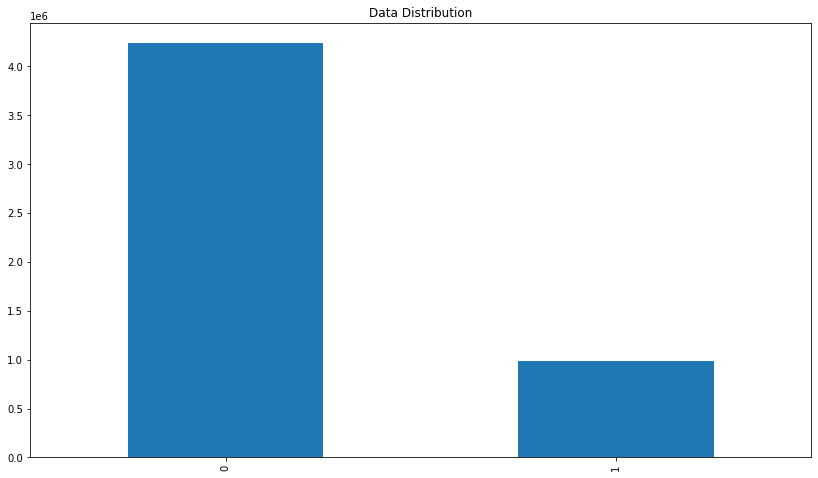

In [26]:
ax = df["DELAYED"].value_counts().plot(kind='bar',figsize=(14,8),title="Data Distribution")


In [27]:
from sklearn.model_selection import train_test_split 

labels = df['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2)


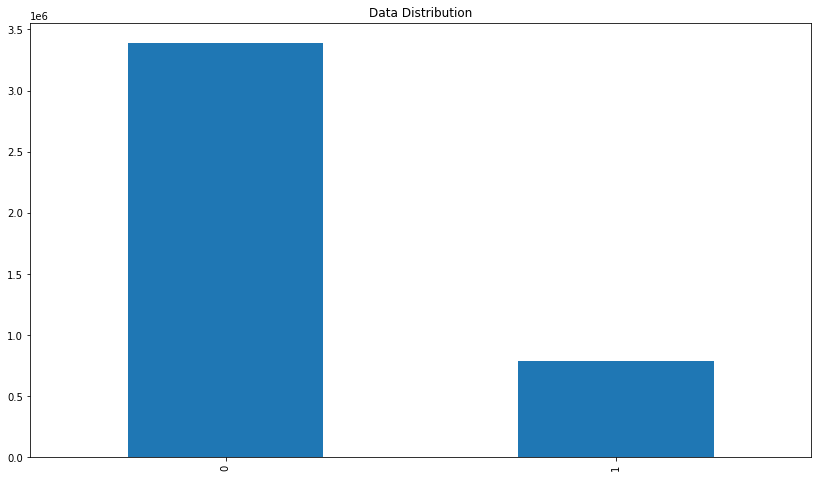

In [28]:
ax = X_train["DELAYED"].value_counts().plot(kind='bar',figsize=(14,8),title="Data Distribution")

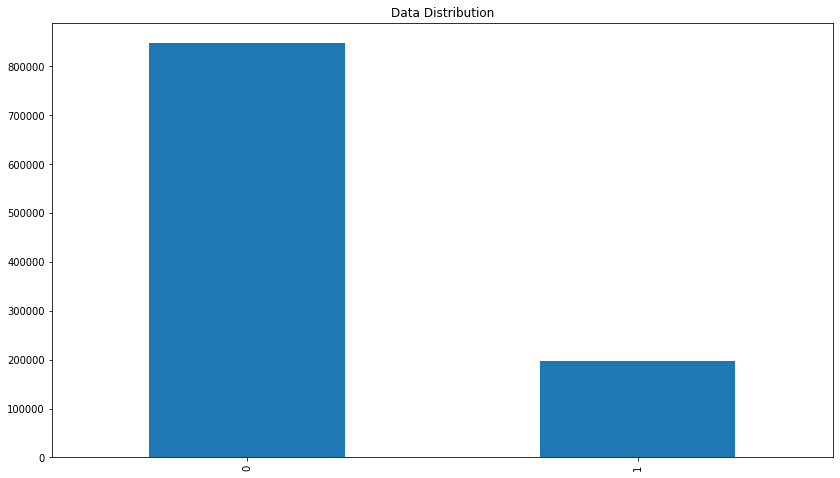

In [29]:
ax = X_test["DELAYED"].value_counts().plot(kind='bar',figsize=(14,8),title="Data Distribution")

In [30]:
X_train.pop('DELAYED')
X_test.pop('DELAYED')
print ('Training Data Shape',X_train.shape, y_train.shape)
print ('Testing Data Shape',X_test.shape, y_test.shape)

Training Data Shape (4177600, 37) (4177600,)
Testing Data Shape (1044400, 37) (1044400,)


In [31]:
# Data For cross validation and GridSearch
Y = df['DELAYED']
X = df.drop(['DELAYED'], axis=1)
print ('Training Data Shape', X.shape)
print ('Testing Data Shape', Y.shape)


Training Data Shape (5222000, 37)
Testing Data Shape (5222000,)


In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, eta0=0.001)
# sgd_clf.fit(X_train, y_train)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# a more exhaustive list of hyperparams would be on the following lines:
# max_iter = [100,150,200]
# penalty = ['l2']
# loss = ['hinge','squared_hinge']
# learning_rate = ['adaptive', 'optimal']
max_iter = [10, 20]
penalty = ['l2']
loss = ['hinge']
learning_rate = ['adaptive', 'optimal']

# Merge the list into the variable
hyperparameters = dict(max_iter = max_iter , penalty = penalty, loss=loss, learning_rate=learning_rate)

model = GridSearchCV(sgd_clf, hyperparameters)
best_model = model.fit(X_train,y_train)

/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklea

In [34]:
from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


In [35]:

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=3)


/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/faisalmasood/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklea

In [36]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[3377350,    9206],
       [  29196,  761848]])

In [37]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.9880604990052577

In [38]:
recall_score(y_train, y_train_pred) 

0.9630918128447975

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [41]:

n_estimators = [5, 10]
criterion = ['entropy', 'gini']
max_depth = [10, 20]

# Merge the list into the variable
hyperparameters = dict(n_estimators = n_estimators , criterion = criterion, max_depth=max_depth)

model = GridSearchCV(forest_clf, hyperparameters)
best_model = model.fit(X_train,y_train)

In [42]:
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=3)

In [43]:
confusion_matrix(y_train, y_train_pred)

array([[3386537,      19],
       [   5442,  785602]])